## 2. Chargement et Préparation des Données

### 2.1 Importation des données


In [3]:
import csv
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [22]:
# Charger le dataset
data_employer = pd.read_csv('datasets/data_Projet/HFY_condensed_data.csv',delimiter=';')

#df_out_time = pd.read_csv("datasets/data_Projet/out_time.csv")
# Afficher les premières lignes du dataset
data_employer.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [17]:
df_in_time = pd.read_csv("datasets/data_Projet/in_time.csv")

ParserError: Error tokenizing data. C error: EOF inside string starting at row 441

In [6]:
data_employer.head(-1) 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,...,6.0,2,6,1,5,2,3,3.0,4.0,3.0
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0


In [7]:
# Display basic information
data_employer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  TotalWorkingYears       

## Remplissage des valeurs manquantes

In [60]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Vérifier les valeurs manquantes AVANT imputation
print("Valeurs manquantes avant :", data_employer.isnull().sum())

# Sélection des colonnes numériques
data_employer = data_employer.select_dtypes(include=[np.number])

# Initialiser et appliquer l'imputation
imputer = SimpleImputer(strategy="median")
housing_num_imputed = pd.DataFrame(imputer.fit_transform(data_employer), columns=data_employer.columns)

# 🔹 Mettre à jour les colonnes numériques dans data_employer
data_employer[data_employer.columns] = housing_num_imputed

# Vérifier s'il reste des valeurs manquantes APRÈS imputation
print("Valeurs manquantes après :", data_employer.isnull().sum())


Valeurs manquantes avant : Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64
Valeurs manquantes après : Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender    

In [61]:
data_employer.isna().sum(axis = 0)

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

### Encodage des variables catégorielles

In [32]:
label_enc_cols = ["Attrition","BusinessTravel", "Department", "EducationField", "Gender", "JobRole",  "MaritalStatus"]
for col in label_enc_cols:
    data_employer[col] = LabelEncoder().fit_transform(data_employer[col])


In [10]:
data_employer.head()
data_employer

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,2,2,6,2,1,0,1,0,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,1,1,10,1,1,0,1,6,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,1,1,17,4,4,1,4,7,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,0,1,2,5,1,1,3,1,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,2,1,10,1,3,1,1,7,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,0,1,6,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,0,2,1,2,4,3,1,1,2,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,0,2,1,25,2,1,1,2,7,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,0,2,2,18,2,3,1,1,2,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


## Préparation des Données
### Gestion des valeurs manquantes

In [11]:
# Imputer les valeurs manquantes pour les variables numériques avec la médiane
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Sélection des colonnes numériques

housing_num = data_employer.select_dtypes(include=[np.number])
imputer.fit(housing_num)


# Remplacement des valeurs manquantes
housing_num_imputed = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns)

# Vérifier s'il reste des valeurs manquantes
housing_num_imputed.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [12]:
# Display summary statistics
data_employer.describe()
data_employer.to_csv("data_employer.csv")

In [13]:
for e in label_enc_cols:
    data_employer[e].value_counts()
#data_employer["Attrition"].value_counts()
#data_employer["BusinessTravel"].value_counts()
#data_employer["Department"].value_counts()
#data_employer["EducationField"].value_counts()
#data_employer["Gender"].value_counts()
data_employer["JobRole"].value_counts()
#data_employer["MaritalStatus"].value_counts()#SOLUTION

JobRole
7    978
6    876
2    777
4    435
0    393
3    306
8    249
5    240
1    156
Name: count, dtype: int64

In [18]:
df_in_time.info

<bound method DataFrame.info of       EmployeeID  2015-01-01           2015-01-02           2015-01-05  \
0              1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1              2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2              3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3              4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4              5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   
...          ...         ...                  ...                  ...   
4405        4406         NaN  2015-01-02 09:20:32  2015-01-05 10:17:53   
4406        4407         NaN  2015-01-02 10:03:41                  NaN   
4407        4408         NaN  2015-01-02 10:01:01  2015-01-05 09:33:00   
4408        4409         NaN  2015-01-02 10:17:05  2015-01-05 10:02:27   
4409        4410         NaN  2015-01-02 09:59:09  2015-01-05 10:16:14   

               2015-01-06           2015-01-07           2015-01-08  \
0     20

In [18]:
df_in_time = df_in_time.apply(pd.to_datetime, errors='coerce')
df_out_time = df_out_time.apply(pd.to_datetime, errors='coerce')
df_in_time_cleaned = df_in_time.dropna(axis=1, how='all')
df_in_time_cleaned.head()

NameError: name 'df_in_time' is not defined

In [16]:
df_in_time_cleaned.describe()

NameError: name 'df_in_time_cleaned' is not defined

In [24]:
# Convertir en datetime (pour s'assurer que les valeurs sont bien reconnues comme des dates)
df_in_time = df_in_time.apply(pd.to_datetime, errors='coerce')
df_out_time = df_out_time.apply(pd.to_datetime, errors='coerce')

# Supprimer les jours où tout le monde est absent
df_in_time_cleaned = df_in_time.dropna(axis=1, how='all')
df_out_time_cleaned = df_out_time.dropna(axis=1, how='all')

# Vérifier combien de jours restent
print(f"Nombre de jours restants après nettoyage : {df_in_time_cleaned.shape[1] - 1}")


Nombre de jours restants après nettoyage : 249


In [38]:
# Renommer la première colonne en "EmployeeID"
df_in_time.rename(columns={df_in_time.columns[0]: "EmployeeID"}, inplace=True)
# Vérifier à nouveau les colonnes
print(df_in_time.head())

                     EmployeeID 2015-01-01          2015-01-02  \
0 1970-01-01 00:00:00.000000001        NaT 2015-01-02 09:43:45   
1 1970-01-01 00:00:00.000000002        NaT 2015-01-02 10:15:44   
2 1970-01-01 00:00:00.000000003        NaT 2015-01-02 10:17:41   
3 1970-01-01 00:00:00.000000004        NaT 2015-01-02 10:05:06   
4 1970-01-01 00:00:00.000000005        NaT 2015-01-02 10:28:17   

           2015-01-05          2015-01-06          2015-01-07  \
0 2015-01-05 10:08:48 2015-01-06 09:54:26 2015-01-07 09:34:31   
1 2015-01-05 10:21:05                 NaT 2015-01-07 09:45:17   
2 2015-01-05 09:50:50 2015-01-06 10:14:13 2015-01-07 09:47:27   
3 2015-01-05 09:56:32 2015-01-06 10:11:07 2015-01-07 09:37:30   
4 2015-01-05 09:49:58 2015-01-06 09:45:28 2015-01-07 09:49:37   

           2015-01-08          2015-01-09          2015-01-12  \
0 2015-01-08 09:51:09 2015-01-09 10:09:25 2015-01-12 09:42:53   
1 2015-01-08 10:09:04 2015-01-09 09:43:26 2015-01-12 10:00:07   
2 2015-01-08 10:0

In [51]:
df_in_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaT,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaT,...,NaT,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaT,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,NaT,2015-01-02 10:15:44,2015-01-05 10:21:05,NaT,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,NaT,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaT,NaT,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,NaT,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,NaT,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaT,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
4,NaT,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,NaT,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaT,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
5,NaT,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,NaT,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaT,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [56]:
# Charger le fichier en mettant la première colonne comme index
df_in_time = pd.read_csv("datasets/data_Projet/in_time.csv", index_col=0)
df_out_time = pd.read_csv("datasets/data_Projet/out_time.csv", index_col=0)
# Récupérer l'heure d'arrivée de l'employé 1 le 1er janvier 2015
arrival_time = df_in_time.loc[3, "2015-01-02"]

print(f"L'employé 2 est arrivé à : {arrival_time}")
if pd.isna(arrival_time):
    print("L'employé 1 était absent ce jour-là.")


L'employé 2 est arrivé à : 2015-01-02 10:17:41


In [75]:
# Créer un DataFrame pour stocker les résultats
df_work_hours = pd.DataFrame(index=df_in_time.index, columns=df_in_time.columns)

# Boucler sur chaque date et chaque employé
for day in df_in_time.columns[1:]:  # On ignore la première colonne qui est "EmployeeID"
    for employee_id in df_in_time.index:
        
        arrival_time = df_in_time.loc[employee_id, day]
        departure_time = df_out_time.loc[employee_id, day]
        

        # Vérifier si les valeurs ne sont pas NaN
        if pd.notna(arrival_time) and pd.notna(departure_time):
            # Calculer la durée en heures
            
            work_duration = departure_time - arrival_time
            work_duration_str = str(work_duration).split()[-1]
            print(work_duration_str)
            work_duration = work_duration_str
        else: 
            work_duration = None  # Laisser vide si absent
        
        # Stocker le résultat
        df_work_hours.loc[employee_id, day] = work_duration

# Sauvegarder dans un fichier CSV
df_work_hours.to_csv("test.csv")

07:12:30
08:06:33
06:41:33
07:20:18
08:03:20
10:46:46
06:50:18
07:05:25
07:21:38
07:37:14
07:15:25
09:15:07
06:18:52
06:25:22
06:49:09
10:59:43
06:56:51
09:22:57
07:25:17
06:14:56
08:54:43
06:28:02
07:10:58
08:57:58
11:10:58
08:01:27
10:46:39
09:40:14
07:14:28
10:29:40
06:25:07
06:20:10
09:44:27
06:18:49
06:13:28
07:15:19
07:28:55
07:50:40
07:04:50
07:31:37
07:27:17
07:30:34
07:25:52
07:36:43
07:11:35
10:47:55
09:33:53
06:37:14
07:44:30
08:36:24
06:46:40
11:00:27
07:51:49
09:40:14
07:55:37
10:30:57
10:26:02
09:56:28
06:54:10
07:13:15
11:15:20
06:14:52
06:16:43
05:28:43
09:42:52
07:42:08
06:40:58
06:44:17
09:28:25
05:58:35
06:52:27
07:39:36
10:22:27
07:00:16
07:34:04
05:57:26
06:00:18
10:19:37
08:24:22
08:04:10
06:48:07
08:01:30
06:34:19
06:19:24
08:44:44
08:01:50
11:00:01
10:13:24
05:56:23
05:32:51
08:04:03
07:34:42
06:59:20
05:55:39
07:48:57
08:09:14
10:39:02
07:49:35
06:04:24
07:16:38
09:28:24
10:35:42
06:23:43
07:44:10
08:08:51
07:27:22
07:52:20
07:26:24
05:49:31
09:39:27
08:38:54
1

KeyboardInterrupt: 

In [50]:
db_time_HHMMSS = pd.read_csv("datasets/data_Projet/work_hours.csv")
db_time_HHMMSS= db_time_HHMMSS.dropna(axis=1, how='all')


,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,...,NaN,NaN,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,1,0 days 08:06:33,0 days 07:27:17,NaN,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaN,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


code génére par le gpt on vas voir ce qu'il fait mais on le supp après 

In [78]:
import pandas as pd



# Supprimer les jours où tout le monde est absent
jours_ouverts = df_in_time.columns[df_in_time.notna().sum() > 0]
df_in_time = df_in_time[jours_ouverts]
df_out_time = df_out_time[jours_ouverts]

# Créer un DataFrame pour stocker les heures travaillées
df_work_hours_zebi = pd.DataFrame(index=df_in_time.index, columns=df_in_time.columns)

# Calcul du temps de travail par jour
for day in jours_ouverts:
    for employee_id in df_in_time.index:
        arrival_time = df_in_time.loc[employee_id, day]
        departure_time = df_out_time.loc[employee_id, day]

        # Vérifier si les valeurs ne sont pas NaN
        if pd.notna(arrival_time) and pd.notna(departure_time):
            work_duration = (departure_time - arrival_time).total_seconds() / 3600  # Convertir en heures
        else:
            work_duration = None  # Absence

        # Stocker le temps de travail en heures
        df_work_hours.loc[employee_id, day] = work_duration

# Calcul de la moyenne des heures travaillées par employé sur les jours ouverts
average_work_hours_per_employee = df_work_hours.mean(axis=1, skipna=True)

# Sauvegarder dans un fichier CSV
average_work_hours_per_employee.to_csv("average_work_hours_per_employee.csv", header=["df_work_hours_zebi"])

print("Fichier 'average_work_hours_per_employee.csv' généré avec succès ! 🎯")


Fichier 'average_work_hours_per_employee.csv' généré avec succès ! 🎯


In [86]:
# Convertir les valeurs en datetime
df_in_time = df_in_time.apply(pd.to_datetime, errors='coerce')
df_out_time = df_out_time.apply(pd.to_datetime, errors='coerce')

# Supprimer les jours où tout le monde est absent
jours_ouverts = df_in_time.columns[df_in_time.notna().sum() > 0]
df_in_time = df_in_time[jours_ouverts]
df_out_time = df_out_time[jours_ouverts]

# Créer un DataFrame pour stocker les heures travaillées
df_average_work_hours_HHMM = pd.DataFrame(index=df_in_time.index, columns=df_in_time.columns)

# Calcul du temps de travail par jour
for day in jours_ouverts:
    for employee_id in df_in_time.index:
        arrival_time = df_in_time.loc[employee_id, day]
        departure_time = df_out_time.loc[employee_id, day]

        # Vérifier si les valeurs ne sont pas NaN
        if pd.notna(arrival_time) and pd.notna(departure_time):
            work_duration = (departure_time - arrival_time).total_seconds() / 3600  # Convertir en heures
        else:
            work_duration = None  # Absence

        # Stocker le temps de travail en heures
        df_work_hours.loc[employee_id, day] = work_duration

# Calcul de la moyenne des heures travaillées par employé
average_work_hours_per_employee = df_work_hours.mean(axis=1, skipna=True)

# Convertir la moyenne en format HH:MM
average_work_hours_formatted = average_work_hours_per_employee.apply(
    lambda x: f"{int(x):02d}:{int((x - int(x)) * 60):02d}" if pd.notna(x) else None
)

# Sauvegarder dans un fichier CSV
average_work_hours_formatted.to_csv("df_average_work_hours_HHMM.csv", header=["Average_Work_Hours_HHMM"])


In [19]:
df_work = pd.read_csv("datasets/data_Projet/work_hours_HHMM.csv")
df_work.head()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/data_Projet/work_hours_HHMM.csv'

In [81]:
df_average_work_hours_HHMM.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# IA entrainement 


In [20]:
#data_employer = pd.read_csv('datasets/data_Projet/data_employer.csv',delimiter=';')

In [24]:
data_heure = pd.read_csv("datasets/data_Projet/average_work_hours_per_employee.csv")

In [70]:
df_merged = pd.concat([data_employer, data_heure], axis=1)
df_merged.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID,df_work_hours_zebi
0,51.0,0.0,2.0,2.0,6.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,3.0,3.0,3.0,4.0,2.0,1,7.373651
1,31.0,1.0,1.0,1.0,10.0,1.0,1.0,0.0,1.0,6.0,...,5.0,1.0,4.0,2.0,4.0,3.0,2.0,4.0,2,7.718969
2,32.0,0.0,1.0,1.0,17.0,4.0,4.0,1.0,4.0,7.0,...,5.0,0.0,3.0,3.0,3.0,2.0,2.0,1.0,3,7.013240
3,38.0,0.0,0.0,1.0,2.0,5.0,1.0,1.0,3.0,1.0,...,8.0,7.0,5.0,2.0,3.0,4.0,4.0,3.0,4,7.193678
4,32.0,0.0,2.0,1.0,10.0,1.0,3.0,1.0,1.0,7.0,...,6.0,0.0,4.0,3.0,3.0,4.0,1.0,3.0,5,8.006175


In [74]:
from sklearn.preprocessing import StandardScaler

# Sélectionner uniquement les colonnes numériques SAUF 'Attrition'
num_cols = df_merged.select_dtypes(include=['number']).columns.difference(["Attrition"])

# Appliquer la normalisation uniquement aux variables explicatives
scaler = StandardScaler()
df_merged[num_cols] = scaler.fit_transform(df_merged[num_cols])

# Vérifier que 'Attrition' n'a pas été modifiée
print(df_merged["Attrition"].unique())


[0. 1.]


In [75]:
from sklearn.model_selection import train_test_split

# Supposons que la colonne cible s'appelle "Turnover" (à ajuster si nécessaire)
y = df_merged["Attrition"]  # Colonne à prédire (0 = reste, 1 = quitte)
X = df_merged.drop(columns=["Attrition"])  # Toutes les autres colonnes

# Séparation en 80% entraînement, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (3528, 25), Test set: (882, 25)


📌 Matrice de Confusion (Régression Logistique) :
 [[718  23]
 [107  34]]
📌 Rapport de Classification (Régression Logistique) :
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       741
         1.0       0.60      0.24      0.34       141

    accuracy                           0.85       882
   macro avg       0.73      0.61      0.63       882
weighted avg       0.83      0.85      0.83       882

📌 AUC-ROC (Régression Logistique) : 0.6050478077353777


C:\Users\flofl\PycharmProjects\Bloc-Intelligence-Artificielle-CESI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


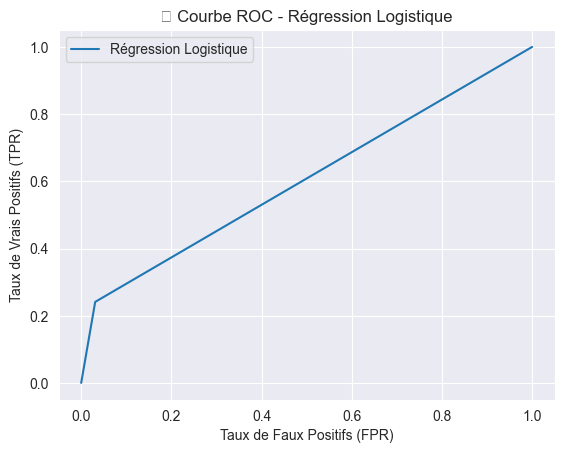

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 🔹 Initialisation du modèle
log_reg = LogisticRegression()

# 🔹 Entraînement du modèle
log_reg.fit(X_train, y_train)

# 🔹 Prédictions
y_pred_log_reg = log_reg.predict(X_test)

# 🔹 Matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("📌 Matrice de Confusion (Régression Logistique) :\n", conf_matrix_log_reg)

# 🔹 Rapport de classification
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("📌 Rapport de Classification (Régression Logistique) :\n", class_report_log_reg)

# 🔹 AUC-ROC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("📌 AUC-ROC (Régression Logistique) :", roc_auc_log_reg)

# 🔹 Courbe ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label="Régression Logistique")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("📈 Courbe ROC - Régression Logistique")
plt.legend()
plt.show()


📌 Matrice de Confusion (Perceptron) :
 [[721  20]
 [130  11]]
📌 Rapport de Classification (Perceptron) :
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       741
         1.0       0.35      0.08      0.13       141

    accuracy                           0.83       882
   macro avg       0.60      0.53      0.52       882
weighted avg       0.77      0.83      0.78       882

📌 AUC-ROC (Perceptron) : 0.5255118155454102


AttributeError: module 'matplotlib.pyplot' has no attribute 'y'

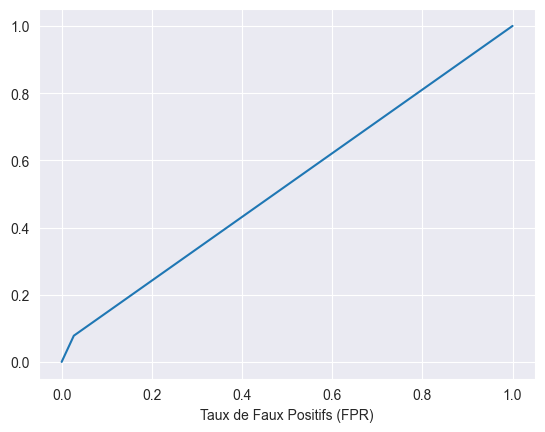

In [81]:


# 🔹 Initialisation du modèle Perceptron
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# 🔹 Entraînement du modèle
perceptron.fit(X_train, y_train)

# 🔹 Prédictions
y_pred_perceptron = perceptron.predict(X_test)

# 🔹 Matrice de confusion
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("📌 Matrice de Confusion (Perceptron) :\n", conf_matrix_perceptron)

# 🔹 Rapport de classification
class_report_perceptron = classification_report(y_test, y_pred_perceptron)
print("📌 Rapport de Classification (Perceptron) :\n", class_report_perceptron)

# 🔹 AUC-ROC
roc_auc_perceptron = roc_auc_score(y_test, y_pred_perceptron)
print("📌 AUC-ROC (Perceptron) :", roc_auc_perceptron)

# 🔹 Courbe ROC
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_pred_perceptron)
plt.plot(fpr_perceptron, tpr_perceptron, label="Perceptron")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.y


📌 Matrice de Confusion (SVM) :
 [[735   6]
 [ 71  70]]
📌 Rapport de Classification (SVM) :
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       741
         1.0       0.92      0.50      0.65       141

    accuracy                           0.91       882
   macro avg       0.92      0.74      0.80       882
weighted avg       0.91      0.91      0.90       882

📌 AUC-ROC (SVM) : 0.7441783673586586


C:\Users\flofl\PycharmProjects\Bloc-Intelligence-Artificielle-CESI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


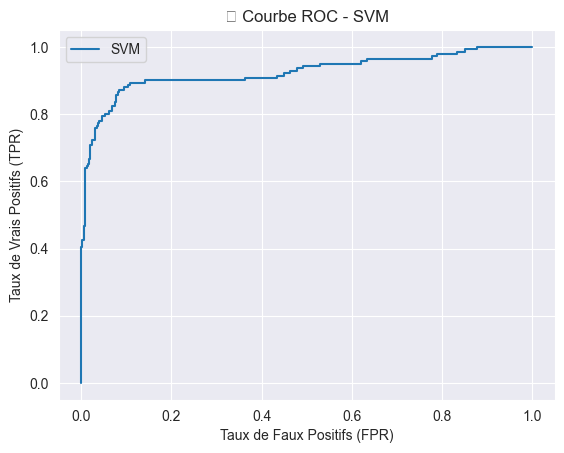

In [82]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 🔹 Initialisation du modèle SVM avec un noyau linéaire (modifiable)
svm = SVC(kernel="rbf", probability=True, random_state=42)  # 'rbf' est souvent plus performant que 'linear'

# 🔹 Entraînement du modèle
svm.fit(X_train, y_train)

# 🔹 Prédictions
y_pred_svm = svm.predict(X_test)

# 🔹 Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("📌 Matrice de Confusion (SVM) :\n", conf_matrix_svm)

# 🔹 Rapport de classification
class_report_svm = classification_report(y_test, y_pred_svm)
print("📌 Rapport de Classification (SVM) :\n", class_report_svm)

# 🔹 AUC-ROC
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("📌 AUC-ROC (SVM) :", roc_auc_svm)

# 🔹 Courbe ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("📈 Courbe ROC - SVM")
plt.legend()
plt.show()


📌 Matrice de Confusion (Naïve Bayes) :
 [[667  74]
 [ 80  61]]
📌 Rapport de Classification (Naïve Bayes) :
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       741
         1.0       0.45      0.43      0.44       141

    accuracy                           0.83       882
   macro avg       0.67      0.67      0.67       882
weighted avg       0.82      0.83      0.82       882

📌 AUC-ROC (Naïve Bayes) : 0.6663795331208545


C:\Users\flofl\PycharmProjects\Bloc-Intelligence-Artificielle-CESI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


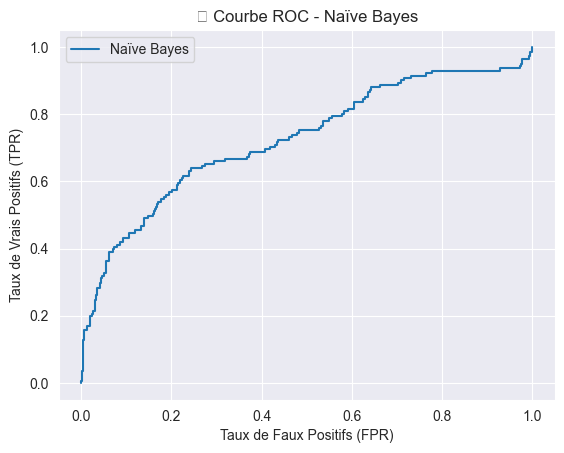

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 🔹 Initialisation du modèle Naïve Bayes
nb = GaussianNB()

# 🔹 Entraînement du modèle
nb.fit(X_train, y_train)

# 🔹 Prédictions
y_pred_nb = nb.predict(X_test)

# 🔹 Matrice de confusion
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("📌 Matrice de Confusion (Naïve Bayes) :\n", conf_matrix_nb)

# 🔹 Rapport de classification
class_report_nb = classification_report(y_test, y_pred_nb)
print("📌 Rapport de Classification (Naïve Bayes) :\n", class_report_nb)

# 🔹 AUC-ROC
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
print("📌 AUC-ROC (Naïve Bayes) :", roc_auc_nb)

# 🔹 Courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr_nb, tpr_nb, label="Naïve Bayes")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("📈 Courbe ROC - Naïve Bayes")
plt.legend()
plt.show()
